# 6.68x - Introduction to ML packages (part 1)

This tutorial is designed to provide a bird's eye view of the ML packages landscape.
The goal is not to give an in-depth explanation of all the features of each packages, but rather demonstrate the purpose of a few widely used ML packages. For more details, we refer the reader to the packages' documentation and other online tutorials.

You can go throguh the Jupyter, Numpy and Matplotlib sections before the course starts, and then start studying the next sections after you have completed unit 1.

https://github.com/varal7/ml-tutorial

## Jupyter

[Jupyter](https://jupyter.org) is not strictly speaking an ML package. It provides a browser front-end connected to an instance of IPython which allows REPL for quick testing, allows to create documents that intertwines code, output, images, and text. This is great for prototyping, demonstrations and tutorials, but terrible for actual coding. 

In [1]:
6*7

42

In [2]:
def tokenize(text):
    return text.split(" ")

In [3]:
text = "In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley"
print(tokenize(text))

['In', 'a', 'shocking', 'finding,', 'scientist', 'discovered', 'a', 'herd', 'of', 'unicorns', 'living', 'in', 'a', 'remote,', 'previously', 'unexplored', 'valley']


## Numpy

In [4]:
import numpy as np

[Numpy](http://www.numpy.org) is desiged to handle large multidimensional arrays and enable efficient computations with them. In the back, it runs pre-compiled C code which is much faster than, say, a Python `for` loop

In the Numpy tutorial, we have covered the basics of Numpy, numpy arrays, element-wise operations, matrices operations and generating random matrices. 
In this section, we'll cover indexing, slicing and broadcasting, which are useful concepts that will be reused in `Pandas` and `PyTorch`.


### Indexing and slicing

Numpy arrays can be indexed and sliced like regular python arrays

In [5]:
a_py = [1, 2, 3, 4, 5, 6, 7, 8, 9]
a_np = np.array(a_py)

In [6]:
print(a_py[3:7:2], a_np[3:7:2])
print(a_py[2:-1:2], a_np[2:-1:2])
print(a_py[::-1], a_np[::-1])

[4, 6] [4 6]
[3, 5, 7] [3 5 7]
[9, 8, 7, 6, 5, 4, 3, 2, 1] [9 8 7 6 5 4 3 2 1]


But you can also use arrays to index other arrays

In [7]:
idx = np.array([7,2])
a_np[idx]

array([8, 3])

In [8]:
# a_py[idx]

Which allows convenient querying, reindexing and even sorting

In [9]:
ages = np.random.randint(low=30, high=60, size=10)
heights = np.random.randint(low=150, high=210, size=10)

print(ages)
print(heights)

[56 43 36 46 52 58 50 45 50 48]
[192 166 174 187 178 184 196 188 176 150]


In [10]:
print(ages < 50)

[False  True  True  True False False False  True False  True]


In [11]:
print(heights[ages < 50])
print(ages[ages < 50])

[166 174 187 188 150]
[43 36 46 45 48]


In [12]:
shuffled_idx = np.random.permutation(10)
print(shuffled_idx)
print(ages[shuffled_idx])
print(heights[shuffled_idx])

[7 4 0 6 9 8 3 2 1 5]
[45 52 56 50 48 50 46 36 43 58]
[188 178 192 196 150 176 187 174 166 184]


In [13]:
sorted_idx = np.argsort(ages)
print(sorted_idx)
print(ages[sorted_idx])
print(heights[sorted_idx])

[2 1 7 3 9 6 8 4 0 5]
[36 43 45 46 48 50 50 52 56 58]
[174 166 188 187 150 196 176 178 192 184]


### Broadcasting

When Numpy is asked to perform an operation between arrays of differents sizes, it "broadcasts" the smaller one to the bigger one.

In [14]:
a = np.array([4, 5, 6])
b = np.array([2, 2, 2])
a * b

array([ 8, 10, 12])

In [15]:
a = np.array([4, 5, 6])
b = 2
a * b

array([ 8, 10, 12])

The two snippets of code above are equivalent but the second is easier to read and also more efficient.

In [16]:
a = np.arange(10).reshape(1,10)
b = np.arange(12).reshape(12,1)

In [17]:
print(a)
print(b)

[[0 1 2 3 4 5 6 7 8 9]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [18]:
print(a * b)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]
 [ 0 10 20 30 40 50 60 70 80 90]
 [ 0 11 22 33 44 55 66 77 88 99]]


## Matplotlib


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
plt.rcParams['figure.figsize'] = [10, 7]

[Matplotlib](https://matplotlib.org) is the go-to library to produce plots with Python. It comes with two APIs: a MATLAB-like that a lot of people have learned to use and love, and an object-oriented API that we recommend using.

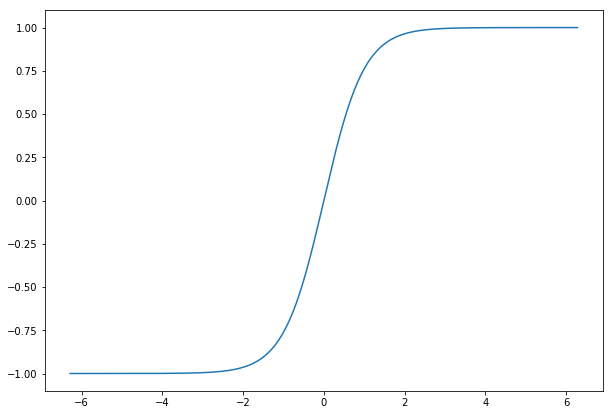

In [21]:
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = np.tanh(x)
fig, ax = plt.subplots()
ax.plot(x, y)

You can plot multiple subplots in the same figure, or multiple functions in the same subplot

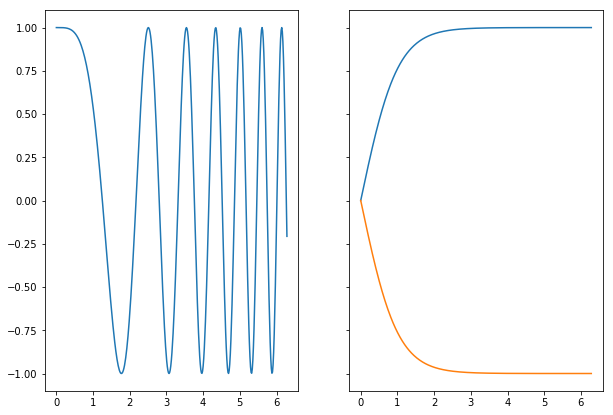

In [22]:
x = np.linspace(0, 2*np.pi, 400)
y1 = np.tanh(x)
y2 = np.cos(x**2)
fig, axes = plt.subplots(1, 2, sharey=True)
axes[1].plot(x, y1)
axes[1].plot(x, -y1)
axes[0].plot(x, y2)

Matplotlib also comes with a lot of different options to customize, the colors, the labels, the axes, etc.

For instance, see this [introduction to matplotlib](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)

## Scikit-learn (read this after you have completed unit 1)

[Scikit-learn](https://scikit-learn.org/) includes a number of features and utilities to kickstart your journey in Machine Learning. 

### A toy example

In [23]:
from sklearn.datasets import make_blobs

In [24]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]

(array([[0.4666179 , 3.86571303],
        [2.84382807, 3.32650945],
        [0.61121486, 2.51245978],
        [3.81653365, 1.65175932],
        [1.28097244, 0.62827388]]), array([0, 0, 0, 1, 1]))

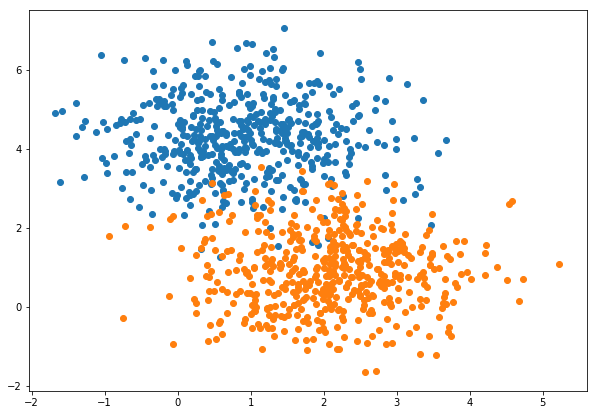

In [25]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

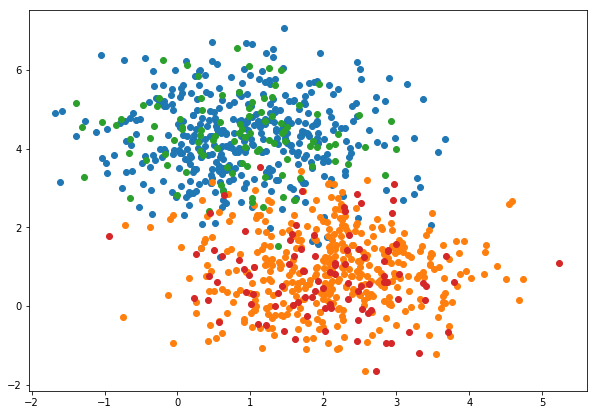

In [28]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

Sklearn uses a uniform and very consistent API, making it easy to switch algorithms

For instance, training and predicting with a perceptron.

In [29]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [30]:
clf = Perceptron(max_iter=40, random_state=0)
# clf = LinearSVC(max_iter=40, random_state=0)

In [31]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

Test accuracy: 0.9600


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [32]:
theta = clf.coef_[0]
theta_0 = clf.intercept_

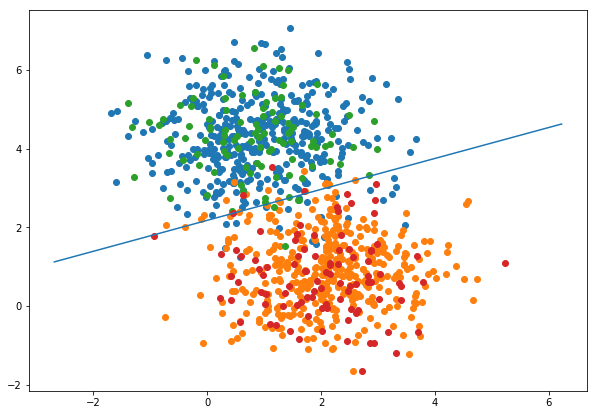

In [33]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])
x_bnd = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1,  400)
y_bnd = - x_bnd * (theta[0] /theta[1]) - (theta_0 / theta[1])
ax.plot(x_bnd, y_bnd)


### Another toy example

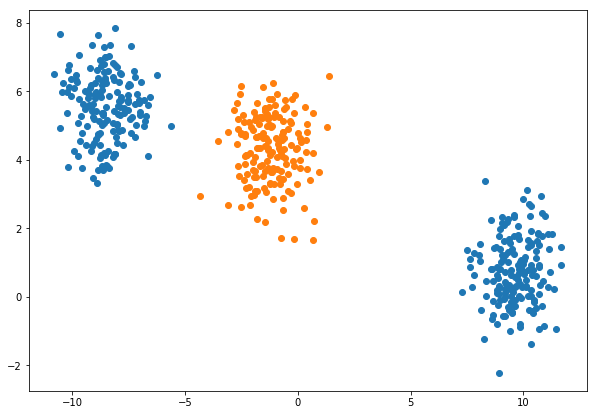

In [34]:
X, y = make_blobs(n_samples=500, centers=3, random_state=7)
y[y==2] = 0
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.svm import SVC
# clf = SVC(kernel="linear", random_state=0)
clf = SVC(kernel="rbf", random_state=0)
clf.fit(X_train, y_train)

C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
y_pred = clf.predict(X_test)

print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

Test accuracy: 1.0000


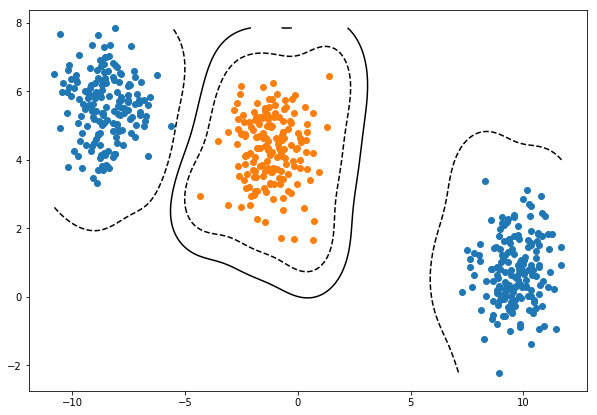

In [38]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])
    
Z = Z.reshape(XX.shape)
ax.contour(XX, YY, Z, colors="black",
    linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

### Classify digits

In [39]:
# from sklearn.datasets import load_breast_cancer
# breast_cancer = load_breast_cancer()
# X, y = breast_cancer.data, breast_cancer.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.datasets import load_digits

In [41]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

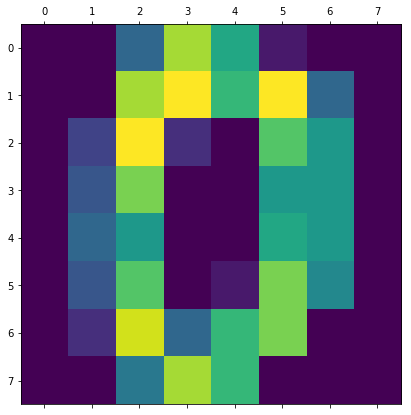

In [42]:
fig, ax = plt.subplots()
ax.matshow(digits.images[0])

In [43]:
X_train.shape

(1437, 64)

In [44]:
clf = Perceptron(max_iter=40, random_state=0)

In [45]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9389


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [46]:
clf = LinearSVC(C=1, random_state=0)

In [47]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9444


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, clf.predict(X_test))

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 0,  1, 33,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 34,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]], dtype=int64)

Scikit-learn also includes utilities to quickly compute a cross validation score...

In [50]:
clf = LinearSVC(C=1, random_state=0)
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Mean: 0.9373, Std: 0.0177


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [51]:
clf = LinearSVC(C=0.1, random_state=0)
scores =  cross_val_score(clf, X_train, y_train, cv=5)
print("Mean: %.4f, Std: %.4f" % (np.mean(scores), np.std(scores)))

C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Mean: 0.9561, Std: 0.0087


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


... or to perform a grid search

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
clf = LinearSVC(random_state=0)
param_grid = {'C': 10. ** np.arange(-6, 4)}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=3, return_train_score=True)

In [54]:
grid_search.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8424657534246576, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8719723183391004, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.9090909090909091, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................ C=1e-06, score=0.8426573426573427, total=   0.0s
[CV] C=1e-06 .........................................................
[CV] ................. C=1e-06, score=0.897887323943662, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ................ C=1e-05, score=0.9075342465753424, total=   0.0s
[CV] C=1e-05 .........................................................
[CV] ...........

C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=0.01, score=0.9619377162629758, total=   0.1s
[CV] C=0.01 ..........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=0.01, score=0.9685314685314685, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.9615384615384616, total=   0.0s
[CV] C=0.01 ..........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=0.01, score=0.971830985915493, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9486301369863014, total=   0.0s
[CV] C=0.1 ...........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................... C=0.1, score=0.972318339100346, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ................... C=0.1, score=0.951048951048951, total=   0.0s
[CV] C=0.1 ...........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................... C=0.1, score=0.958041958041958, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.9507042253521126, total=   0.0s
[CV] C=1.0 ...........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................... C=1.0, score=0.934931506849315, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.9584775086505191, total=   0.0s
[CV] C=1.0 ...........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=1.0, score=0.9055944055944056, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.9475524475524476, total=   0.0s
[CV] C=1.0 ...........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=1.0, score=0.9401408450704225, total=   0.0s
[CV] C=10.0 ..........................................................
[CV] ................. C=10.0, score=0.9417808219178082, total=   0.0s
[CV] C=10.0 ..........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=10.0, score=0.9584775086505191, total=   0.0s
[CV] C=10.0 ..........................................................
[CV] ................. C=10.0, score=0.9265734265734266, total=   0.1s
[CV] C=10.0 ..........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=10.0, score=0.951048951048951, total=   0.0s
[CV] C=10.0 ..........................................................
[CV] ................. C=10.0, score=0.9471830985915493, total=   0.0s
[CV] C=100.0 .........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=100.0, score=0.928082191780822, total=   0.0s
[CV] C=100.0 .........................................................
[CV] ................ C=100.0, score=0.9480968858131488, total=   0.0s
[CV] C=100.0 .........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=100.0, score=0.9405594405594405, total=   0.0s
[CV] C=100.0 .........................................................
[CV] ................ C=100.0, score=0.9440559440559441, total=   0.0s
[CV] C=100.0 .........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................ C=100.0, score=0.9436619718309859, total=   0.0s
[CV] C=1000.0 ........................................................
[CV] ............... C=1000.0, score=0.9246575342465754, total=   0.0s
[CV] C=1000.0 ........................................................


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............... C=1000.0, score=0.9515570934256056, total=   0.0s
[CV] C=1000.0 ........................................................
[CV] ............... C=1000.0, score=0.9090909090909091, total=   0.0s
[CV] C=1000.0 ........................................................
[CV] ................ C=1000.0, score=0.951048951048951, total=   0.1s
[CV] C=1000.0 ........................................................
[CV] ............... C=1000.0, score=0.9401408450704225, total=   0.0s


C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\steve\Documents\WPy64-3680\python-3.6.8.amd64\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.5s finished


In [55]:
print(grid_search.best_params_)

{'C': 0.001}


In [56]:
print(grid_search.best_score_)

0.9665970772442589


In [57]:
y_pred = grid_search.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9639


And a lot more features! 
We have only looked at some classification models and some model selection features, but sklearn can also be used for regression, 

## Pandas

In [58]:
import pandas as pd

[Pandas](http://pandas.pydata.org) is a library that provides a set of tools for data analysis (Python Data Analysis Library). 

Pandas dataframes can be created by importing a CSV file (or TSV, or JSON, or SQL, etc.)

In [59]:
# df = pd.read_csv("file.csv")

Pandas dataframes can also be created directly from a dictionary of arrays.

In [60]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.02612867, 0.01914682, 0.01795144, 0.03869643, 0.15518594,
       0.13603592, 0.11828327, 0.13164744, 0.11509223, 0.12925429]), 'std_fit_time': array([0.00263031, 0.0017168 , 0.00178414, 0.00558574, 0.01340216,
       0.01535486, 0.01825486, 0.0165448 , 0.01039517, 0.01528959]), 'mean_score_time': array([0.00059814, 0.00099716, 0.00039916, 0.0003993 , 0.0005981 ,
       0.00019937, 0.        , 0.00079832, 0.00079832, 0.00039907]), 'std_score_time': array([4.88383810e-04, 4.15696997e-07, 4.88870617e-04, 4.89044859e-04,
       4.88344194e-04, 3.98731232e-04, 0.00000000e+00, 3.99161254e-04,
       3.99160542e-04, 4.88752886e-04]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                   100.0, 1000.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.0

In [61]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026129,0.002630,0.000598,4.883838e-04,1e-06,{'C': 1e-06},0.842466,0.871972,0.909091,0.842657,...,0.872651,0.027467,10,0.882969,0.880662,0.869679,0.881842,0.872507,0.877532,0.005383
1,0.019147,0.001717,0.000997,4.156970e-07,1e-05,{'C': 1e-05},0.907534,0.913495,0.944056,0.902098,...,0.919972,0.015905,9,0.929258,0.931185,0.922676,0.932233,0.925412,0.928153,0.003594
2,0.017951,0.001784,0.000399,4.888706e-04,0.0001,{'C': 0.0001},0.934932,0.941176,0.965035,0.940559,...,0.949896,0.013812,4,0.963319,0.964286,0.960035,0.960904,0.958369,0.961382,0.002159
3,0.038696,0.005586,0.000399,4.890449e-04,0.001,{'C': 0.001},0.958904,0.965398,0.965035,0.965035,...,0.966597,0.006563,1,0.982533,0.982578,0.983493,0.980017,0.981787,0.982082,0.001165
4,0.155186,0.013402,0.000598,4.883442e-04,0.01,{'C': 0.01},0.955479,0.961938,0.968531,0.961538,...,0.963814,0.005743,2,0.993886,0.993031,0.994787,0.992181,0.993929,0.993563,0.000887
5,0.136036,0.015355,0.000199,3.987312e-04,0.1,{'C': 0.1},0.948630,0.972318,0.951049,0.958042,...,0.956159,0.008707,3,0.997380,0.997387,0.997394,0.994787,0.994796,0.996349,0.001271
6,0.118283,0.018255,0.000000,0.000000e+00,1,{'C': 1.0},0.934932,0.958478,0.905594,0.947552,...,0.937370,0.017718,7,0.996507,0.994774,0.980017,0.993050,0.996531,0.992176,0.006214
7,0.131647,0.016545,0.000798,3.991613e-04,10,{'C': 10.0},0.941781,0.958478,0.926573,0.951049,...,0.945024,0.010698,5,0.998253,0.997387,0.993918,0.993050,0.991327,0.994787,0.002628
8,0.115092,0.010395,0.000798,3.991605e-04,100,{'C': 100.0},0.928082,0.948097,0.940559,0.944056,...,0.940849,0.006878,6,0.986900,0.983449,0.995656,0.988705,0.989592,0.988861,0.003997
9,0.129254,0.015290,0.000399,4.887529e-04,1000,{'C': 1000.0},0.924658,0.951557,0.909091,0.951049,...,0.935282,0.016336,8,0.986900,0.979965,0.986968,0.986099,0.994796,0.986946,0.004713


Pandas columns are also Numpy arrays, so they obey to the same indexing magic

In [62]:
df[df['param_C'] < 0.01]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026129,0.002630,0.000598,4.883838e-04,1e-06,{'C': 1e-06},0.842466,0.871972,0.909091,0.842657,...,0.872651,0.027467,10,0.882969,0.880662,0.869679,0.881842,0.872507,0.877532,0.005383
1,0.019147,0.001717,0.000997,4.156970e-07,1e-05,{'C': 1e-05},0.907534,0.913495,0.944056,0.902098,...,0.919972,0.015905,9,0.929258,0.931185,0.922676,0.932233,0.925412,0.928153,0.003594
2,0.017951,0.001784,0.000399,4.888706e-04,0.0001,{'C': 0.0001},0.934932,0.941176,0.965035,0.940559,...,0.949896,0.013812,4,0.963319,0.964286,0.960035,0.960904,0.958369,0.961382,0.002159
3,0.038696,0.005586,0.000399,4.890449e-04,0.001,{'C': 0.001},0.958904,0.965398,0.965035,0.965035,...,0.966597,0.006563,1,0.982533,0.982578,0.983493,0.980017,0.981787,0.982082,0.001165


They also provide most functionality you would expect as database user (`df.sort_values`, `df.groupby`, `df.join`, `df.concat`, etc.)

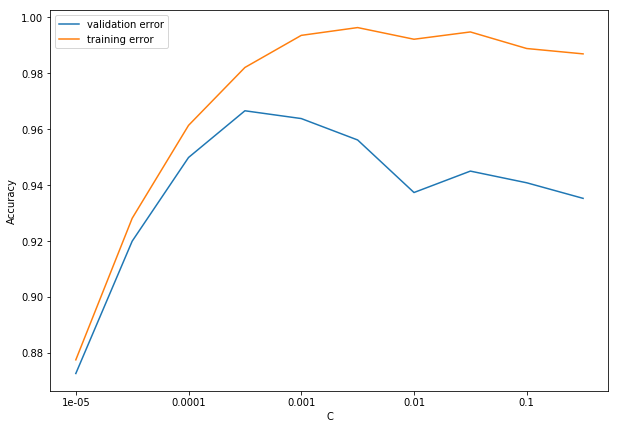

In [63]:
fig, ax = plt.subplots()
ax.plot(df['mean_test_score'], label="validation error")
ax.plot(df['mean_train_score'], label="training error")
ax.set_xticklabels(df['param_C'])
ax.set_xlabel("C")
ax.set_ylabel("Accuracy")
ax.legend(loc='best');

## Other packages 

Other packages that didn't make the cut:
- [Plotly](https://plot.ly) and [Seaborn](http://seaborn.pydata.org): two other plotting libraries
- [Scipy](https://www.scipy.org): a science library built on top of Numpy
- [Scrapy](https://www.scipy.org): a web crawling library
- [pdb](https://docs.python.org/3/library/pdb.html): a debugger for python (not ML-specific but terribly useful)
- [tqdm](https://github.com/tqdm/tqdm): a progress bar (not ML-specific)

Next time:
- [Pytorch](https://pytorch.org)

In [64]:
np.__version__

'1.16.2'